<a id='parameter'></a>
# Configuration

In [30]:
import os
import sys
import h5py
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
# plt.rcParams['figure.constrained_layout.use'] = True
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


****************
**Define the locations of application folder, DART-PFLOTRAN interface folder, and the configuation file of interest**

In [5]:
# Main directory names
app_par_dir  = "/Users/jian449/Codes/DART/manhattan/models/pflotran/applications"
dart_dir     = "/Users/jian449/Codes/DART/manhattan"
dart_pf_dir  = "/Users/jian449/Codes/DART/manhattan/models/pflotran"     # The dart pflotran utitlity folder name
fig_dir      = "/Users/jian449/OneDrive - PNNL/Documents/Publications/2020DART_PFLOTRAN/simulation_plots"
app_dir_name_list = ["1dthermal_perm_parastate"]
app_dir_list = [os.path.join(app_par_dir, app_dir_name) 
                for app_dir_name in app_dir_name_list]          # The application folder name
# Get the configuration file
config_file_list  = [os.path.join(app_dir, "work/config.nml")
                     for app_dir in app_dir_list]


****************
**Change the locations of the all the files saved in the original config_file according to the new defined locations if necessary (this is used for the case that the application folder is moved/copied from another location)**

In [6]:
change_path_name_files = os.path.join(dart_pf_dir, "utils/change_file_paths_in_confignml.py")
for i in range(len(app_dir_list)):
    app_dir, config_file = app_dir_list[i], config_file_list[i]
    subprocess.run("python {} {} {} {}".format(change_path_name_files, config_file, dart_pf_dir, app_dir),
                   shell=True, check=True)


****************
**Import the loading functions**

In [27]:
sys.path.append(dart_pf_dir)
from utils.plot_da_result import DaResults
dar_list = [DaResults(config_file) for config_file in config_file_list]
for i in range(len(app_dir_list)):
    dar_list[i].setup()

# Plot permeability

****************
**Assemble permeability**

In [54]:
perm_df = pd.DataFrame(columns=["value","mda"])
for i in range(len(app_dir_list)):
    nens = dar_list[i].nens
    perm_value  = dar_list[i].posterior['para'][0,:,-1,0]
    perm_df_mda = pd.DataFrame(np.array([perm_value,np.ones(nens)*(i+1)]).T, 
                               columns=["value","mda"])
    perm_df = perm_df.append(perm_df_mda)
perm_df = perm_df.astype({"value":float,"mda":int})

****************
**Plot**

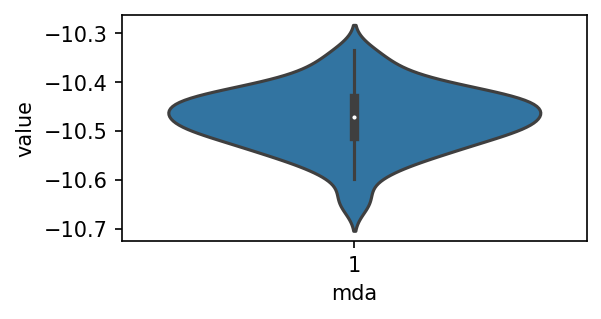

In [55]:
_, ax = plt.subplots(1, 1, figsize=(4,2), dpi=150)
ax = sns.violinplot(x="mda", y="value", 
#                     hue="sex",
                    data=perm_df)
#                     palette="Set2", split=True,
#                     scale="count", inner="stick",
#                     scale_hue=False, bw=.2)

In [31]:
tips = sns.load_dataset("tips")

In [32]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
